# Bayesian models

## Bayesian linear model

In this section, we will perform Bayesian inference in a linear model:
\begin{align}
  Y_i & \sim Normal(\mu_i, sigma^2) \\
  \mu_i & = x_i^' \beta
\end{align}

### Load packages

In [1]:
using LinearAlgebra
using FillArrays
using Distributions
using DataFrames
using Plots
using Turing
using StatsPlots
import DisplayAs
default(dpi = 120, plot_titlefontsize = 11, titlefontsize = 11)

### Simulate data

In [2]:
# dimensions and effects
n, q = 200, 5
β = [1.5, -2, 3, -1, 2]

# predictors
X = randn(n, q)

# response variable
data = DataFrame(X, :auto)
data.y = 3.1 .+ X * β + 2 * randn(n)
data

200×6 DataFrame
 Row │ x1         x2           x3          x4          x5          y
     │ Float64    Float64      Float64     Float64     Float64     Float64
─────┼────────────────────────────────────────────────────────────────────────
   1 │  0.28262   -1.88856     -0.464996   -0.250587   -0.826283    5.88276
   2 │ -0.612679  -1.84229      0.750945   -0.673301   -0.878275    6.63893
   3 │ -0.461776   1.63838      1.6168     -0.102007   -1.0729      4.01516
   4 │  0.805776  -0.622883    -0.760923   -1.65914    -0.390934    6.33041
   5 │ -0.402082   1.05891      0.691886    1.06393    -0.0473822  -2.08384
   6 │ -0.872314  -0.732903    -0.0717099   0.755776    0.393306    0.14236
   7 │  0.616879  -0.524928    -0.807328   -0.244361   -0.735035    0.86637
   8 │ -1.84412   -0.00484702  -0.139825   -1.29181    -1.82678    -2.94558
  ⋮  │     ⋮           ⋮           ⋮           ⋮           ⋮           ⋮
 194 │  0.440462  -0.666812     0.895681   -0.589273   -0.577018    4.40245
 195 │ -1.75732    1.22949     -0.582929    1.71939     0.769213   -1.28612
 196 │  1.50681    0.724696     1.09366    -0.240647   -0.626719    6.84493
 197 │ -1.85743    0.864018    -1.25782     0.0308121  -0.681979   -4.6498
 198 │ -0.746243  -1.84435     -0.371469    1.17055     0.948562    7.89707
 199 │ -0.498905   0.583926    -1.22304    -1.40719    -0.688018   -3.17714
 200 │  1.18483   -0.268137    -0.361304    1.57646     0.557596    0.0461887
                                                              185 rows omitted

Let's visualise the relationship of the predictors with the response variable.

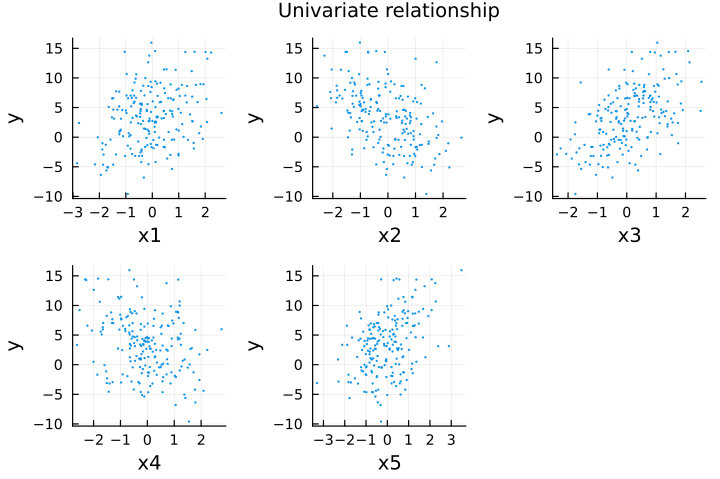

In [3]:
plot(Matrix(data[:, 1:5]), data.y, st = :scatter, layout = 5, ms = 1, msw = -1,
    label = :false, xlab = "x" .* string.(transpose(1:5)), ylab = "y",
    plot_title = "Univariate relationship")
DisplayAs.PNG(current())

### Define the Bayesian model in Turing

In [4]:
@model function blm(y, X, p)
    # prior
    σ² ~ InverseGamma(0.5, 0.5)
    β ~ MvNormal(Zeros(p), 10 * I)

    # likelihood
    y ~ MvNormal(X * β, σ² * I)
end

blm (generic function with 2 methods)

### Get samples from the posterior distribution

Evaluate the model in the data.

In [5]:
X = hcat(ones(n), Matrix(data[:, 1:5]))
m1 = blm(data.y, X, size(X, 2))

DynamicPPL.Model{typeof(Main.var"##2152".blm), (:y, :X, :p), (), (), Tuple{Vector{Float64}, Matrix{Float64}, Int64}, Tuple{}, DynamicPPL.DefaultContext}(Main.var"##2152".blm, (y = [5.882758642769808, 6.6389331891567025, 4.015162892267059, 6.33040590070301, -2.0838428718057633, 0.14236015102441124, 0.8663701876889791, -2.9455787292923086, -3.1547757690942273, 8.82720490055154  …  -1.707061356972143, 6.585021941309233, 11.418705070683206, 4.402452813910562, -1.2861217933129532, 6.844933381975945, -4.6498013369198254, 7.897067353151275, -3.1771397976974054, 0.04618870599615077], X = [1.0 0.2826196915335791 … -0.2505867461615132 -0.8262826557332811; 1.0 -0.6126785538417857 … -0.6733008669533355 -0.8782754159019943; … ; 1.0 -0.4989050199961782 … -1.407190485892127 -0.6880176702162548; 1.0 1.1848279924888885 … 1.576458266161905 0.5575958694475741], p = 6), NamedTuple(), DynamicPPL.DefaultContext())

Sample from the posterior distribution using MCMC.

In [6]:
chain = Turing.sample(m1, NUTS(0.65), 5000, progress = false)

┌ Info: Found initial step size
└   ϵ = 0.0125


Chains MCMC chain (5000×19×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 2.06 seconds
Compute duration  = 2.06 seconds
parameters        = σ², β[1], β[2], β[3], β[4], β[5], β[6]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

          σ²    4.0633    0.4205     0.0059    0.0071   4390.6494    0.9998    ⋯
        β[1]    3.0649    0.1452     0.0021    0.0020   5611.1247    0.9998    ⋯
        β[2]    1.2921    0.1364     0.0019    0.0021   4466.8518    0.9998    ⋯
        β[3]   -2.0102    0.1371     0.0019    0.0018   6046.5602    0.9999    ⋯
        β[4]    2.9421    0.1484   

Visualise traceplot and density for $\sigma^2$.

In [7]:
plot(chain[[:σ²]], lw = [0.3 0.8], size = (500, 250))
DisplayAs.PNG(current())

Visualise traceplot and density for $\beta$.

In [8]:
plot(chain[namesingroup(chain, :β)], size = (900, 1200))
DisplayAs.PNG(current())
# corner(chain)

### Bayesian estimation

Remember that we use that posterior distribution to do inference.

#### Point estimates

A common point estimation is the expected value of the posterior distribution:
$E(\theta \mid y)$.

In [9]:
summarize(chain)

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

          σ²    4.0633    0.4205     0.0059    0.0071   4390.6494    0.9998    ⋯
        β[1]    3.0649    0.1452     0.0021    0.0020   5611.1247    0.9998    ⋯
        β[2]    1.2921    0.1364     0.0019    0.0021   4466.8518    0.9998    ⋯
        β[3]   -2.0102    0.1371     0.0019    0.0018   6046.5602    0.9999    ⋯
        β[4]    2.9421    0.1484     0.0021    0.0020   4878.6908    0.9999    ⋯
        β[5]   -1.1683    0.1415     0.0020    0.0018   5901.6098    0.9998    ⋯
        β[6]    2.1697    0.1377     0.0019    0.0017   5465.1663    1.0001    ⋯
                                                                1 column omitted


In [10]:
mean(chain)

Mean
  parameters      mean
      Symbol   Float64

          σ²    4.0633
        β[1]    3.0649
        β[2]    1.2921
        β[3]   -2.0102
        β[4]    2.9421
        β[5]   -1.1683
        β[6]    2.1697


#### Credible Interval

We can obtain credible intervals to summarise our results. One easy way to obtain them
is to compute the quantiles.

In [11]:
α = 0.05
quantile(chain, q = [α/2, 1-α/2])

Quantiles
  parameters      2.5%     97.5%
      Symbol   Float64   Float64

          σ²    3.3167    4.9685
        β[1]    2.7849    3.3588
        β[2]    1.0251    1.5654
        β[3]   -2.2757   -1.7363
        β[4]    2.6497    3.2293
        β[5]   -1.4432   -0.8945
        β[6]    1.9034    2.4425


#### Excedance probability

Another common summary that is exceedance probabilities. For example, $Pr(\beta_2 > 1)$.
Lets start visualising the posterior distribution.

In [12]:
β2pos = vec(chain["β[3]"])
histogram(β2pos, normalize = true, label = false,
    title = "π(β₂∣y)", xlab = "β₂")
DisplayAs.PNG(current())

Computing exceedance probability.

In [13]:
mean(β2pos .> 1.5)

0.0

#### Functions of the parameters

We can also obtain the posterior distribution of functions of the parameter. For
example, $\beta_2 - \beta_3$:

In [14]:
diffpos = chain["β[3]"] - chain["β[4]"] |> vec
histogram(β2pos, normalize = true, label = false,
    title = "π(β₂-β₃∣y)", xlab = "β₂-β₃")
DisplayAs.PNG(current())

We compute, point estimates, credible interval, so on.

In [15]:
α = 0.05
quantile(diffpos, [α/2, 1-α/2])

2-element Vector{Float64}:
 -5.349922746679569
 -4.551354722649133

#### Predictive

Lets obtain the predictive distribution for a $x^*$

In [16]:
# Posterior samples, new profile
B = Array(chain)
xnew = vcat([1], randn(5))
ynew = zeros(size(B, 1))

# Sample predictions using the posterior parameter samples
for i = 1:size(B, 1)
    meannew = xnew' * B[i, Not(1)]
    ynew[i] = Normal(meannew, sqrt(B[i, 1])) |> rand
end
ynew

5000-element Vector{Float64}:
  -7.010031841929788
  -3.270307230934726
  -1.3263520701962603
 -10.047462685932315
  -4.118025014696051
  -8.437374788408595
  -4.663273563456659
  -4.701057581948484
  -4.3513389450353746
  -2.3166234920601814
   ⋮
  -3.770928372493412
  -7.658260533490344
  -5.1569454529833845
  -4.113372239822927
  -7.174943811059622
  -7.348799277732191
  -3.581471941400598
  -6.05764637782841
  -4.289768967063162

Visualize

In [17]:
histogram(ynew, title = "π(y* ∣ y, x*)", label = false)
DisplayAs.PNG(current())

Summarise prediction

In [18]:
quantile(ynew, [α/2, 1 - α/2])

2-element Vector{Float64}:
 -8.651636092563654
 -0.6224785021644634

Exceedance probability, for example $Pr(Y^* > 0 \mid y)$

In [19]:
mean(ynew .> 0)

0.0118

## Bayesian generalized linera model

In this section, we will perform Bayesian inference in a generalized linear model:
\begin{align}
  Y_i & \sim Exponential(\mu_i) \\
  \log(\mu_i) & = x_i^' \beta
\end{align}

### Load packages

In [20]:
using LinearAlgebra
using FillArrays
using Distributions
using DataFrames
using Plots
using Turing
using StatsPlots
import CSV
import DisplayAs
default(dpi = 120, titlefontsize = 11)

### Read data

Simulated data corresponding to the time fur seals need to capture their first prey.

In [21]:
data = CSV.read("../data/simulated/time-to-capture.csv", DataFrame)
n = nrow(data)

10

Visualize

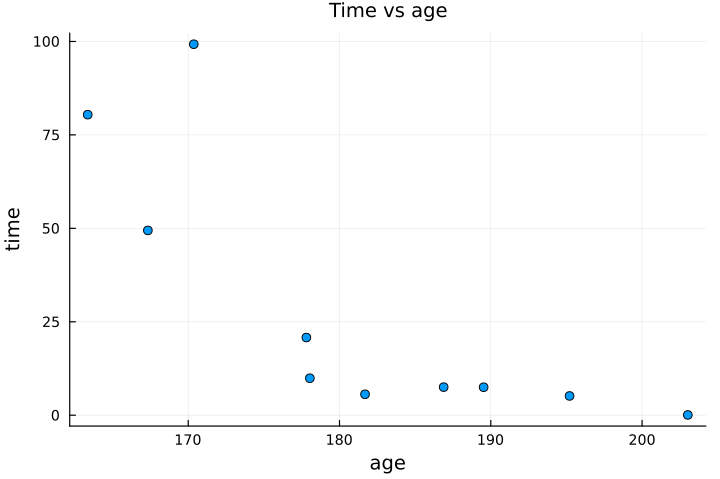

In [22]:
plot(data.age, data.time, st = :scatter, label = false,
    xlab = "age", ylab = "time", title = "Time vs age")

### Define the Bayesian model in Turing

In [23]:
@model function glmexp(y, X, n)
    # prior
    β ~ MvNormal(Zeros(2), 10 * I)

    # parametros intermedios
    μ = exp.(X * β)

    # likelihood
    for i in 1:n
        y[i] ~ Exponential(μ[i])
    end
end

glmexp (generic function with 2 methods)

### Get samples from the posterior distribution

Evaluate the model in the data.

In [24]:
X = hcat(ones(n), data.age)
m1 = glmexp(data.time, X, size(X, 1))

DynamicPPL.Model{typeof(Main.var"##2152".glmexp), (:y, :X, :n), (), (), Tuple{Vector{Float64}, Matrix{Float64}, Int64}, Tuple{}, DynamicPPL.DefaultContext}(Main.var"##2152".glmexp, (y = [20.78831313602355, 5.157479970876626, 49.445725075394265, 9.904663041485154, 0.07705144940575732, 80.41054648907986, 7.519265524213915, 99.26180880969429, 5.602735167658112, 7.496484258159109], X = [1.0 177.81053657696327; 1.0 195.20743891875193; … ; 1.0 181.6878282217242; 1.0 189.52755934279944], n = 10), NamedTuple(), DynamicPPL.DefaultContext())

Sample from the posterior distribution using MCMC.

In [25]:
chain = Turing.sample(m1, NUTS(0.65), init_params = [0, 0], 10000, progress = false)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia

Chains MCMC chain (10000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 1.8 seconds
Compute duration  = 1.8 seconds
parameters        = β[1], β[2]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

        β[1]    5.9372    2.9911     0.0299    0.0780   1437.3346    1.0007    ⋯
        β[2]   -0.0152    0.0176     0.0002    0.0005   1417.0642    1.0008    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5%
      Symbol   Float64   Float64   Float64   Float64   Float64

     

Visualise traceplot and density

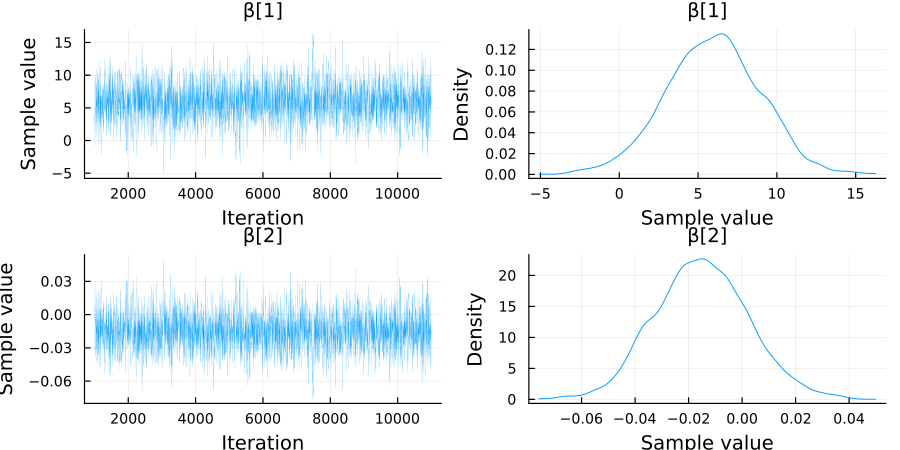

In [26]:
plot(chain, lw = [0.1 0.8], size = 1.5 .* (500, 250))
DisplayAs.PNG(current())

### Bayesian estimation

#### Point estimates

In [27]:
summarize(chain)

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

        β[1]    5.9372    2.9911     0.0299    0.0780   1437.3346    1.0007    ⋯
        β[2]   -0.0152    0.0176     0.0002    0.0005   1417.0642    1.0008    ⋯
                                                                1 column omitted


In [28]:
mean(chain)

Mean
  parameters      mean
      Symbol   Float64

        β[1]    5.9372
        β[2]   -0.0152


#### Credible Interval

In [29]:
α = 0.1
quantile(chain, q = [α/2, 1-α/2])

Quantiles
  parameters      5.0%     95.0%
      Symbol   Float64   Float64

        β[1]    1.0045   10.7156
        β[2]   -0.0430    0.0141


#### Excedance probability

$Pr(\beta_1 > 0)$

In [30]:
mean(chain["β[2]"] .< 0)

0.8089

#### Predictive

Let's obtain the prediction for different ages:

In [31]:
# Posterior samples and new profiles
B = Array(chain)
xnews = range(extrema(data.age)..., length = 100)
ynews = zeros(length(xnews), size(B, 1))

# Sample predictions
for i = 1:size(B, 1)
    meannew = exp.(B[i, 1] .+ B[i, 2] * xnews)
    ynews[:, i] = rand.(Exponential.(meannew))
end
ynews

100×10000 Matrix{Float64}:
  3.53299     5.93324    0.617162  …   9.59217   31.667     50.7164
  5.64997    16.0626    24.518        17.4481    27.3642    22.3434
 19.0891     31.2233     7.54664      14.3424     5.21013   15.089
 77.3463      9.37932   35.7734       43.7693    32.4885    15.0454
 38.6088    102.421     60.6705        8.69711   57.4322    99.0851
 34.9244      9.48472    7.1138    …  87.5087    37.9919     8.37987
 43.2891     90.2817    14.4545       16.8081    82.8127     7.83546
 29.9038     19.9094     4.39813       3.74755   35.3391     6.32825
  7.6567      9.00277    6.51491       9.03132   55.9882     6.83499
 21.4321     83.0404    37.8363       26.3517     6.31553    0.637222
  ⋮                                ⋱                        
  3.85204     6.77214    8.35649      29.1094     3.43069   36.5988
  0.742693    1.06683    5.54426      30.501      2.38594   41.3923
  0.969273    0.360977  21.7584       36.1811    10.9282    75.9233
  2.62739    34.8706   

Summarise posterior prediction

In [32]:
postmean = mean(ynews, dims = 2)
α = 0.1
postquant = quantile(Chains(ynews'), q = [α/2, 1 - α/2])[:, 2:3]

100×2 Matrix{Float64}:
 1.59337   106.384
 1.53122   104.311
 1.48011   102.887
 1.51946   103.087
 1.49854   104.532
 1.35847   100.744
 1.64425   100.631
 1.41623   103.02
 1.49979   102.356
 1.46107   102.371
 ⋮         
 0.829944   75.9898
 0.755325   78.2635
 0.716646   76.5783
 0.761524   78.8721
 0.740479   78.2035
 0.750438   75.6299
 0.785997   77.2903
 0.749484   77.8665
 0.751886   77.4907

predictive classic

In [33]:
b_mean = mean(B, dims = 1)'
meannew = exp.(b_mean[1] .+ b_mean[2] * xnews)
meanquant = map(x -> quantile.(x, [0.1, 0.9]), Exponential.(meannew))
meanquant = hcat(meanquant...)'

100×2 adjoint(::Matrix{Float64}) with eltype Float64:
 3.35424  73.3048
 3.33393  72.8609
 3.31374  72.4196
 3.29367  71.9811
 3.27373  71.5452
 3.2539   71.1119
 3.2342   70.6812
 3.21461  70.2532
 3.19514  69.8277
 3.17579  69.4049
 ⋮        
 1.92988  42.1763
 1.9182   41.9209
 1.90658  41.667
 1.89503  41.4147
 1.88356  41.1639
 1.87215  40.9146
 1.86081  40.6668
 1.84954  40.4206
 1.83834  40.1758

Visualize

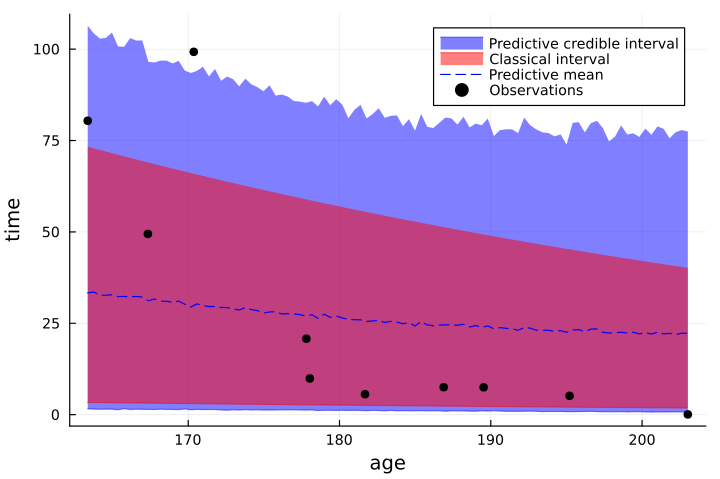

In [34]:
plot(xnews, postquant[:, 1], fillrange = postquant[:, 2], color = :blue, alpha = 0.5,
    xlab = "age", ylab = "time",
    label = "Predictive credible interval")
plot!(xnews, meanquant[:, 1], fillrange = meanquant[:, 2], color = :red, alpha = 0.5,
    label = "Classical interval")
plot!(xnews, postmean, color = :blue, linestyle = :dash,
    label = "Predictive mean")
plot!(data.age, data.time, st = :scatter, msw = -1, color = :black,
    label = "Observations")
DisplayAs.PNG(current())

## Bayesian generalized liner mixed model

In this section, we will perform Bayesian inference in a generalized linear mixed model:
\begin{align}
  Y_{ij} & \sim Normal(\mu_{ij}) \\
  \mu_{ij} & = x_{ij}^' \beta + \alpha_{j}
\end{align}

### Load packages

In [35]:
using LinearAlgebra
using FillArrays
using Distributions
using DataFrames
using Plots
using Turing
using StatsPlots
import CSV
import DisplayAs
default(dpi = 120, plot_titlefontsize = 11, titlefontsize = 11)

### Simulate data

In [36]:
# dimensions
n, q = 200, 2
ng = 10
groups = rand(1:ng, n)

# predictors
β = [1.5, -2]
X = randn(n, q)

# group effects
eg = 2 * randn(ng)

# data
data = DataFrame(X, :auto)
data.groups = groups
data.y = X * β + eg[data.groups] + 2 * randn(n)

200-element Vector{Float64}:
 -5.012477488673822
 -0.8236261890353762
  0.2723745189857755
 -1.8678232634670566
 -0.1463455047716986
 -2.5275892754337237
 -1.4690439333781857
  3.9354374793729683
  1.5922539371000899
  2.663228658100206
  ⋮
  6.237725177900977
  2.580685158411076
  1.3386499710872461
  5.897995077357863
  5.499696969155492
 -0.6812018910678839
 -5.501289583422434
 -3.3511314366852876
 -6.313768978664449

### Visualize

Univariate relationship.

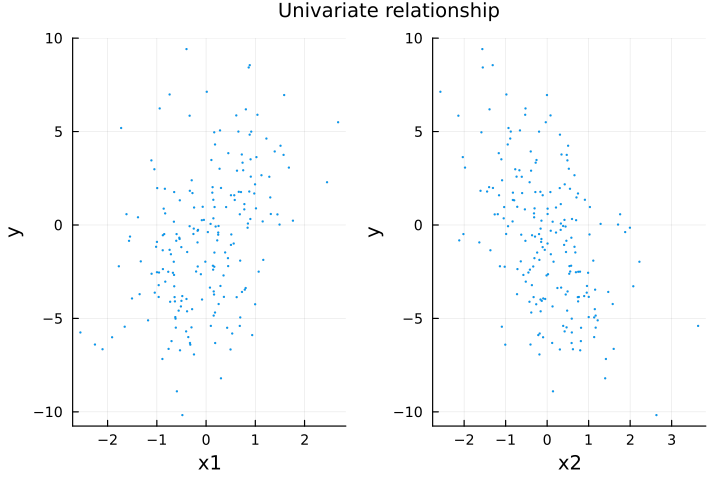

In [37]:
plot(Matrix(data[:, 1:2]), data.y, st = :scatter, layout = 2,
    ms = 1, msw = -1, label = :false,
    xlab = "x" .* string.(transpose(1:2)), ylab = "y",
    plot_title = "Univariate relationship"
)

Groups comparison.

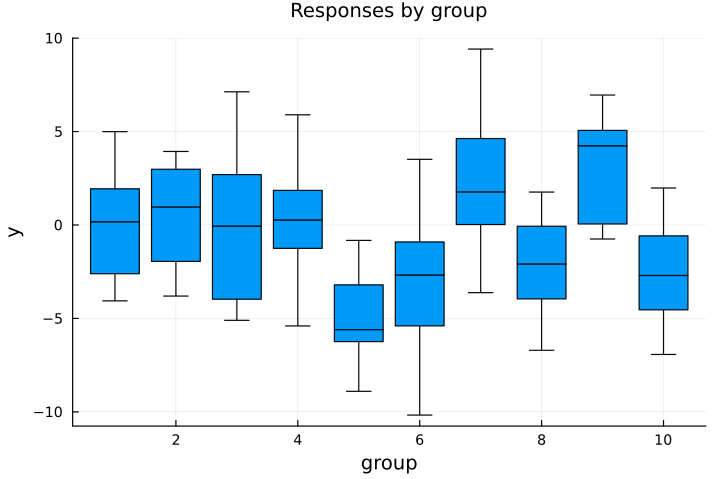

In [38]:
plot(data.groups, data.y, st = :boxplot, label = false,
    xlab = "group", ylab = "y",
    plot_title = "Responses by group")

### Define the Bayesian model in Turing

In [39]:
@model function glmm(y, X, groups, ng)
    # prior
    σ² ~ InverseGamma(0.5, 0.5)
    τ² ~ InverseGamma(0.5, 0.5)
    β ~ MvNormal(Zeros(3), 10 * I)

    # random effect
    α ~ MvNormal(Zeros(ng), τ² * I)

    # likelihood
    y ~ MvNormal(X * β + α[groups], σ² * I)
end

glmm (generic function with 2 methods)

### Get samples from the posterior distribution

Evaluate the model in the data.

In [40]:
X = hcat(ones(n), Matrix(data[:, 1:2]))
m1 = glmm(data.y, X, data.groups, ng)

DynamicPPL.Model{typeof(Main.var"##2152".glmm), (:y, :X, :groups, :ng), (), (), Tuple{Vector{Float64}, Matrix{Float64}, Vector{Int64}, Int64}, Tuple{}, DynamicPPL.DefaultContext}(Main.var"##2152".glmm, (y = [-5.012477488673822, -0.8236261890353762, 0.2723745189857755, -1.8678232634670566, -0.1463455047716986, -2.5275892754337237, -1.4690439333781857, 3.9354374793729683, 1.5922539371000899, 2.663228658100206  …  -3.86158076537684, 6.237725177900977, 2.580685158411076, 1.3386499710872461, 5.897995077357863, 5.499696969155492, -0.6812018910678839, -5.501289583422434, -3.3511314366852876, -6.313768978664449], X = [1.0 -0.62024680704993 0.5927582153967782; 1.0 0.22607855398376056 -2.117741269364471; … ; 1.0 0.07876755105018034 0.3367756911590593; 1.0 -0.3268748492685526 0.12086088247950966], groups = [3, 5, 4, 6, 4, 8, 1, 2, 4, 7  …  10, 9, 1, 10, 4, 4, 7, 5, 1, 6], ng = 10), NamedTuple(), DynamicPPL.DefaultContext())

Sample from the posterior distribution using MCMC.

In [41]:
chain = Turing.sample(m1, NUTS(0.65), 5000)

Sampling   0%|                                          |  ETA: N/A
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling   0%|▎                                         |  ETA: 0:05:23
Sampling   1%|▍                                         |  ETA: 0:02:42
Sampling   2%|▋                                         |  ETA: 0:01:52
Sampling   2%|▉                                         |  ETA: 0:01:24
Sampling   2%|█                                         |  ETA: 0:01:08
Sampling   3%|█▎                                        |  ETA: 0:00:57
Sampling   4%|█▌                                        |  ETA: 0:00:50
Sampling   4%|█▋                                        |  ETA: 0:00:44
Sampling   4%|█▉                                        |  ETA: 0:00:39
Sampling   5%|██▏                                       |  ETA: 0:00:35
Sampling   6%|██▎                                       |  ETA: 0:00:32
Sampling   6%|██▌                                       |  ETA: 0:00:29
Sampling   6%|██▊     

Chains MCMC chain (5000×27×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 6.34 seconds
Compute duration  = 6.34 seconds
parameters        = σ², τ², β[1], β[2], β[3], α[1], α[2], α[3], α[4], α[5], α[6], α[7], α[8], α[9], α[10]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

          σ²    4.0661    0.4204     0.0059    0.0053   4437.7161    0.9998    ⋯
          τ²    5.7120    3.3393     0.0472    0.0620   3005.8409    0.9998    ⋯
        β[1]   -0.6140    0.7107     0.0101    0.0164   1462.7230    1.0007    ⋯
        β[2]    1.3629    0.1678     0.0024    0.0027   3958.6103    

Visualise traceplot and density of fixed effects

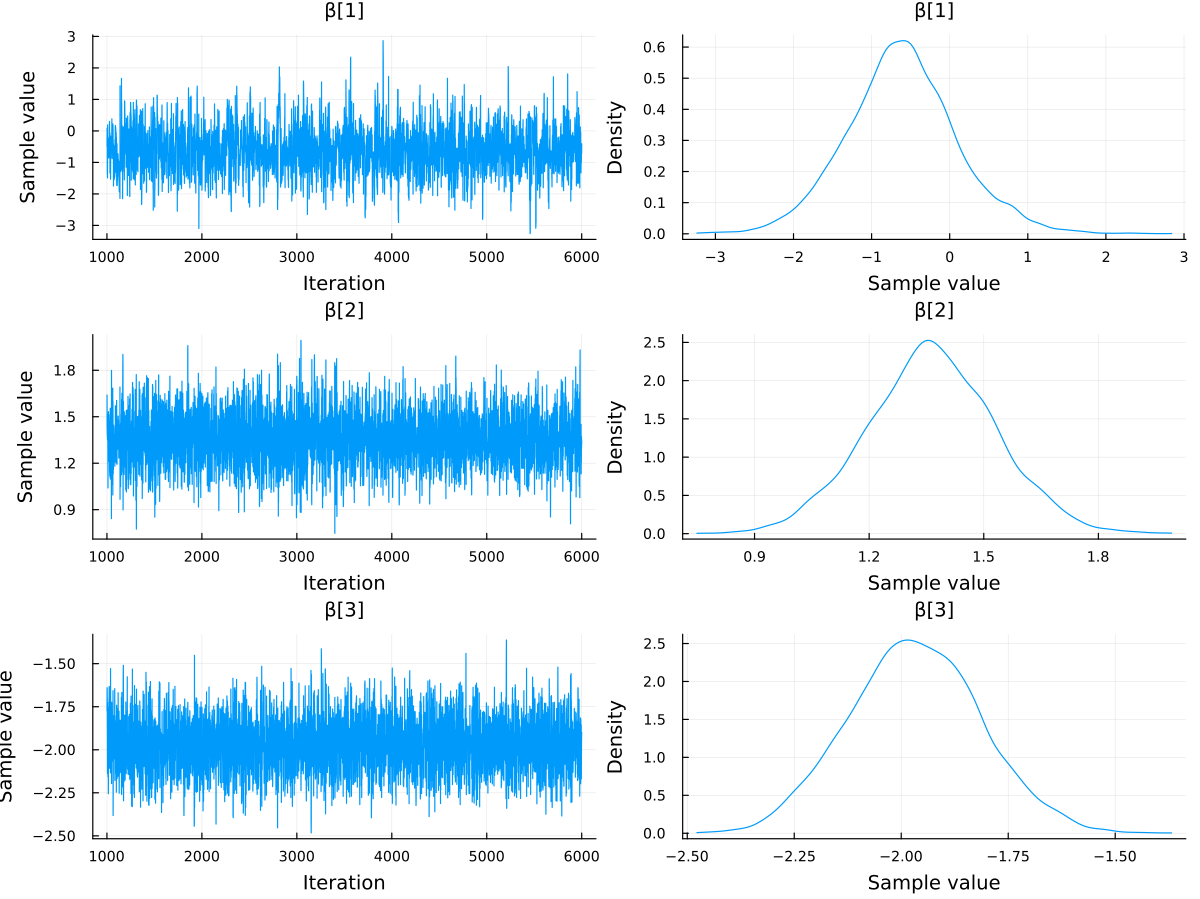

In [42]:
plot(chain[namesingroup(chain, :β)])
DisplayAs.PNG(current())

Visualise traceplot and density of random effects

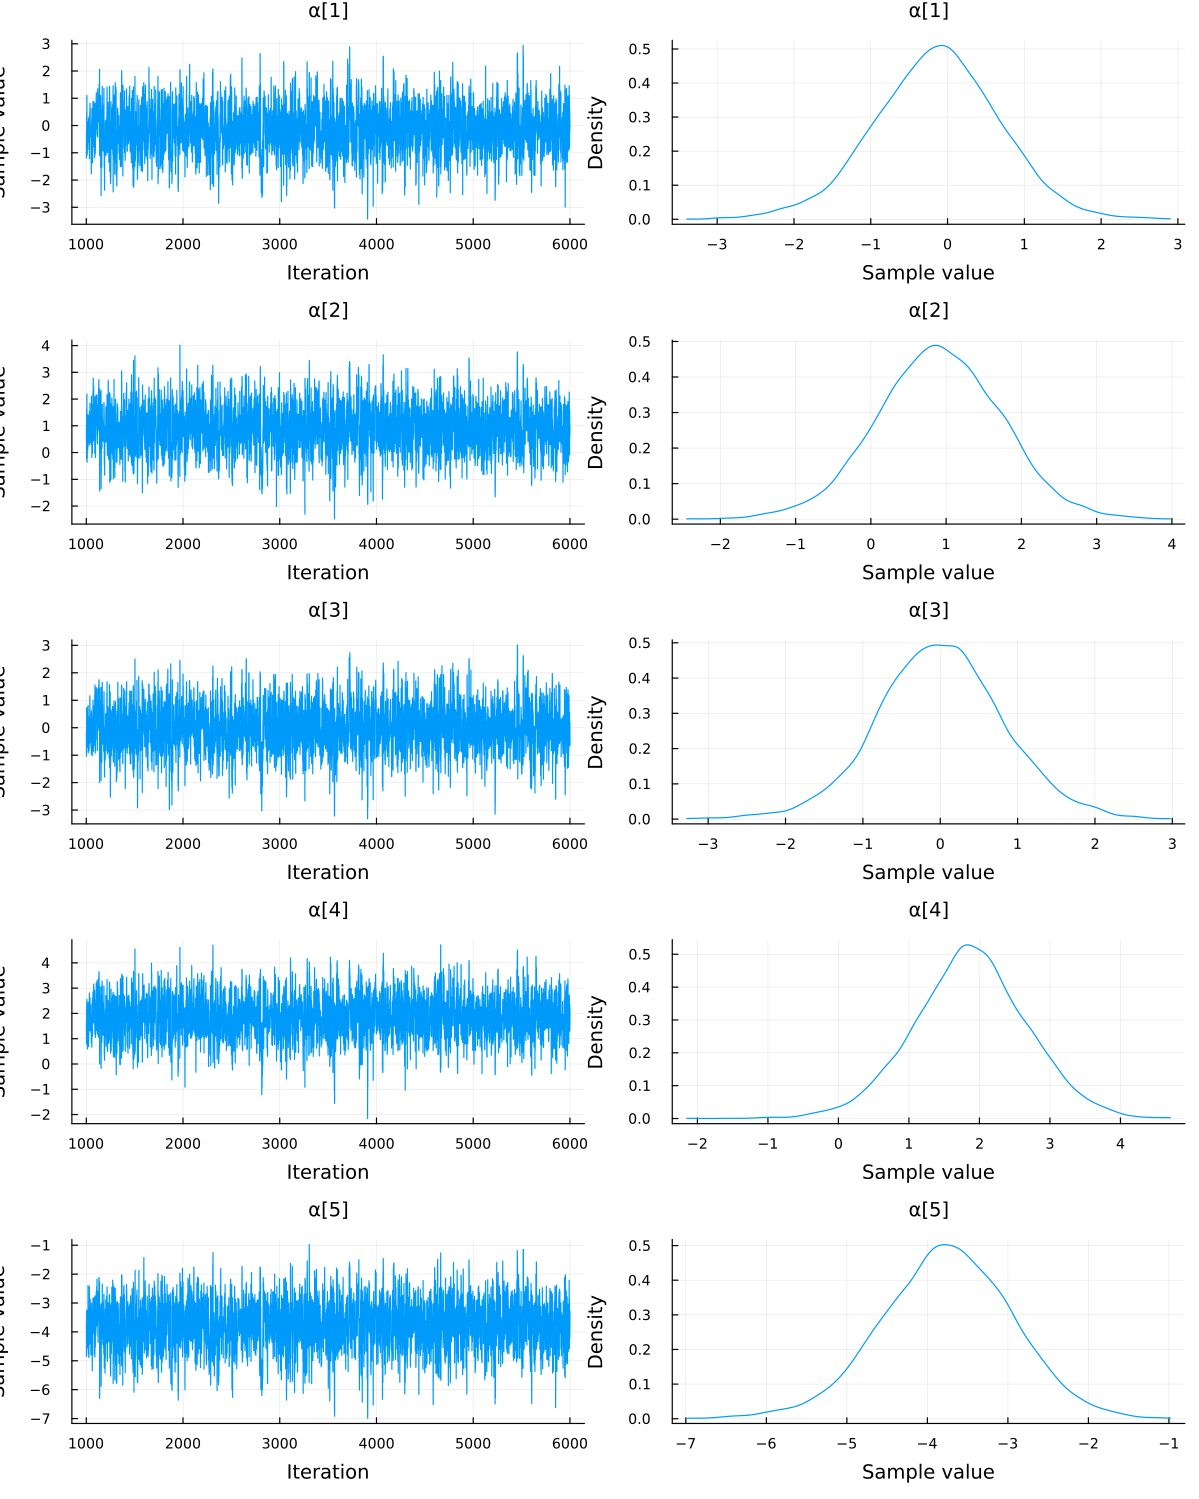

In [43]:
plot(chain[namesingroup(chain, :α)[1:5]])
DisplayAs.PNG(current())

In [44]:
plot(chain[namesingroup(chain, :α)[6:10]])
DisplayAs.PNG(current())

### Bayesian estimation

#### Point estimates

In [45]:
summarize(chain)

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

          σ²    4.0661    0.4204     0.0059    0.0053   4437.7161    0.9998    ⋯
          τ²    5.7120    3.3393     0.0472    0.0620   3005.8409    0.9998    ⋯
        β[1]   -0.6140    0.7107     0.0101    0.0164   1462.7230    1.0007    ⋯
        β[2]    1.3629    0.1678     0.0024    0.0027   3958.6103    1.0001    ⋯
        β[3]   -1.9682    0.1535     0.0022    0.0021   4584.0338    1.0005    ⋯
        α[1]   -0.1404    0.8238     0.0117    0.0165   1782.4283    1.0008    ⋯
        α[2]    0.9016    0.8326     0.0118    0.0173   1810.7580    0.9999    ⋯
        α[3]   -0.0034    0.8247     0.0117    0.0177   1736.4030    1.0002    ⋯
        α[4]    1.8675    0.8089     0.0114    0.0175   1704.5848    1.0001    ⋯
        α[5]   -3.7625    0.8173     0.0116    0.0167   1766.6535    1.0005    ⋯
        

In [46]:
mean(chain)

Mean
  parameters      mean
      Symbol   Float64

          σ²    4.0661
          τ²    5.7120
        β[1]   -0.6140
        β[2]    1.3629
        β[3]   -1.9682
        α[1]   -0.1404
        α[2]    0.9016
        α[3]   -0.0034
        α[4]    1.8675
        α[5]   -3.7625
        α[6]   -2.2255
        α[7]    2.6125
        α[8]   -0.6654
        α[9]    2.9443
       α[10]   -2.0723


#### Credible Interval

In [47]:
α = 0.1
quantile(chain, q = [α/2, 1-α/2])

Quantiles
  parameters      5.0%     95.0%
      Symbol   Float64   Float64

          σ²    3.4301    4.8068
          τ²    2.3264   12.0978
        β[1]   -1.7678    0.5969
        β[2]    1.0828    1.6431
        β[3]   -2.2229   -1.7136
        α[1]   -1.4973    1.1735
        α[2]   -0.4640    2.2553
        α[3]   -1.3440    1.3514
        α[4]    0.5367    3.1928
        α[5]   -5.1098   -2.4504
        α[6]   -3.5536   -0.9595
        α[7]    1.3124    3.9135
        α[8]   -2.0304    0.6619
        α[9]    1.5420    4.3798
       α[10]   -3.4785   -0.7293


#### Excedance probability
$Pr(\beta_2 > 2)$

In [48]:
mean(chain["α[2]"] .> 0)

0.8658

#### Visualize random effects

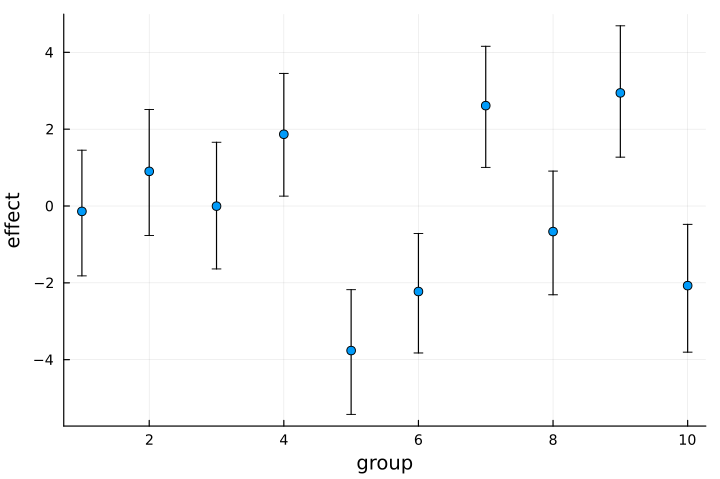

In [49]:
α = 0.05
postmean = mean(chain[namesingroup(chain, :α)])[:, 2]
postquant = chain[namesingroup(chain, :α)] |>
    x -> quantile(x, q = [α/2, 1-α/2])[:, 2:3]

plot(1:10, postmean, st = :scatter,
    yerror = (postmean - postquant[:, 1], postquant[:, 2] - postmean),
    label = false, xlab = "group", ylab = "effect"
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*